<h1 style='text-align:center'>Line Detection with OpenCV</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('src.jpg')

<h2>Grayscale</h2>

In [2]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

<h2>Define Model</h2>

In [3]:
rho = 1  # distance resolution
theta = np.pi / 180  # angular resolution (distinguish small details)
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # min pixels making up a line
max_line_gap = 20  # max gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),5)

In [4]:
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)

<h2>Before</h2>

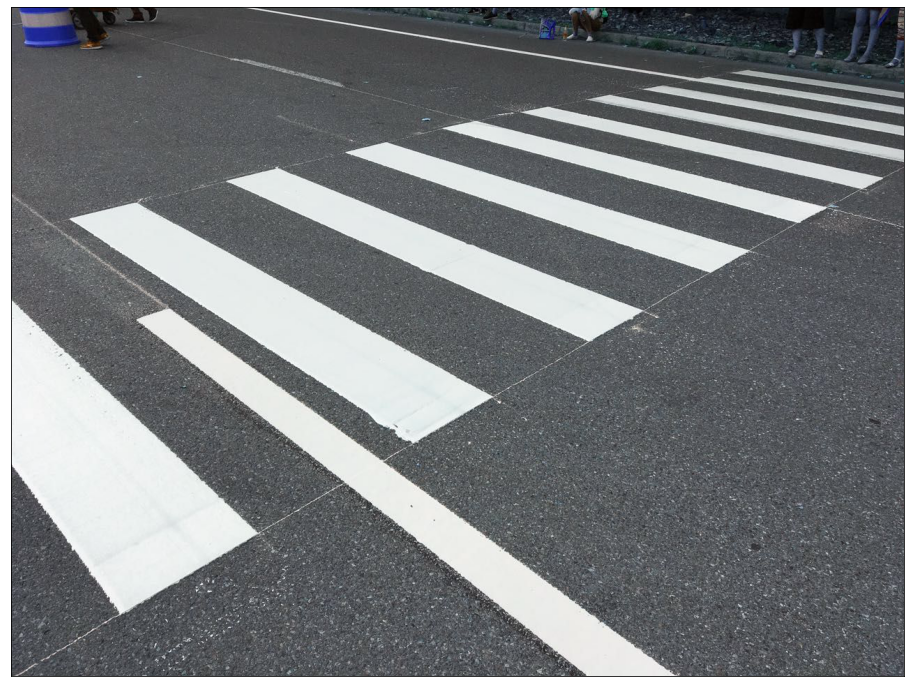

In [5]:
image=cv2.imread('src.jpg')
plt.figure(figsize=(16,16))
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()

<h2>After</h2>

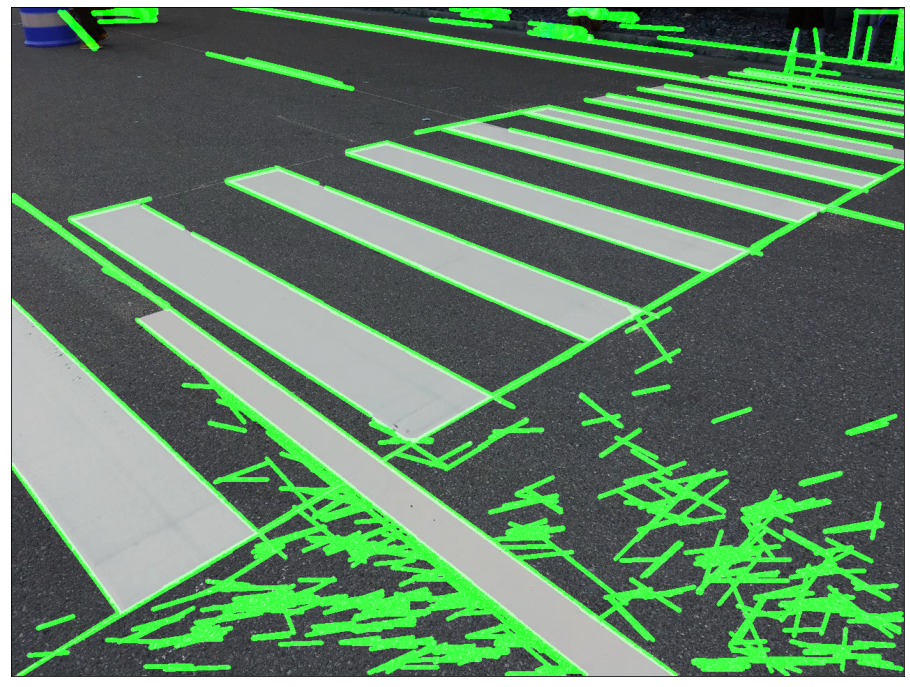

In [6]:
plt.figure(figsize=(16,16))
plt.imshow(lines_edges)
plt.xticks([]),plt.yticks([])
plt.show()